### PACF

In [2]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

import numpy as np
import matplotlib.pyplot as plt

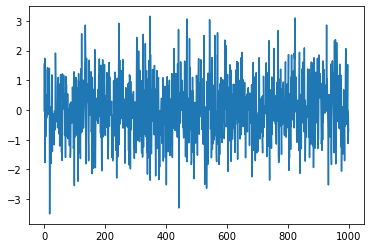

In [4]:
# generate iid noise from std normal

x0 = np.random.randn(1000)

plt.plot(x0)

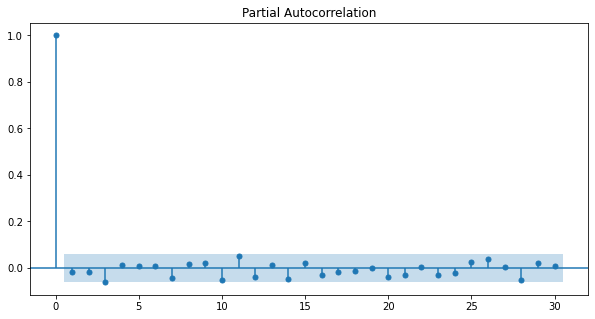

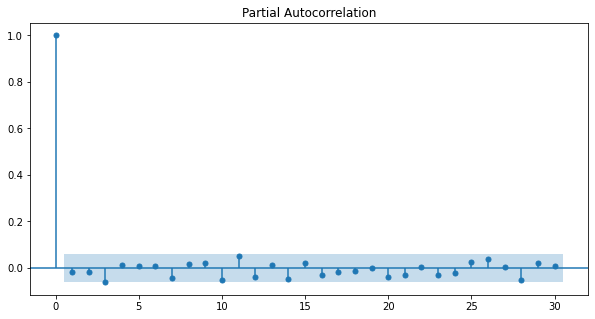

In [5]:
# Autoregressive model --> PACF
# subplot func to manage plot size
# --> axis object then passed to pacf func

fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(x0, ax=ax)

# most of the lagged pacf values are very near 0
# 1st value is 1 since just autocorrelation of each point with itself
# multiple values where pacf goes just outside confidence bound
# confidence interval --> allowed to happen randomly 5% of the time even when there is no true correlation
# since values so close tthreshold --> okay to ignore them

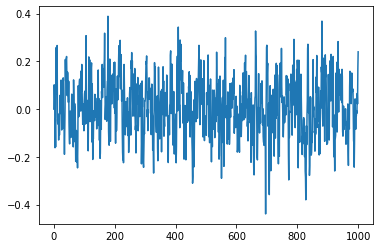

In [6]:
# AR(1) process and test pacf again

# x1 list with initial value 0
# loop 100 iterations
# next value -> 0.5 --> * previous + gaussian noise with std dev 0.1 <-- x

x1 = [0]
for i in range(1000):
    x = 0.5 * x1[-1] + 0.1 * np.random.randn()
    x1.append(x)
x1 = np.array(x1)

plt.plot(x1)

# looks stationary, no real difference with iid noise

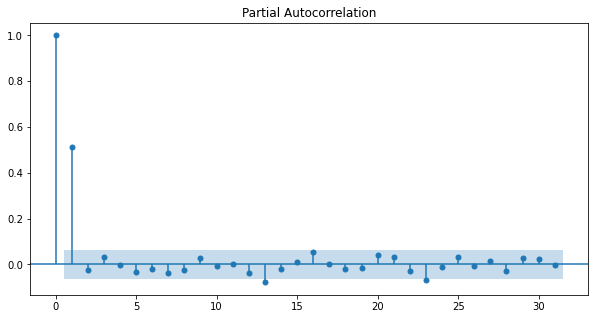

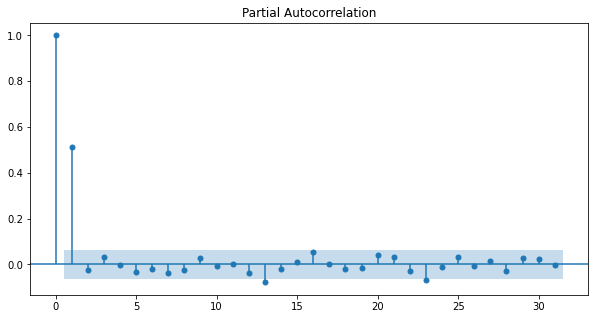

In [7]:
# plot pacf for x1

fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(x1, ax=ax)

# pacf value at 1 with far outside confidence threshold
# --> ts AR(1) pocess

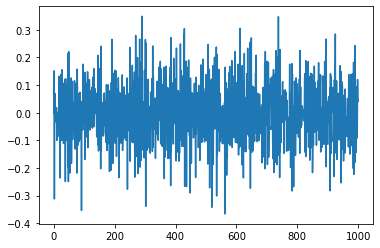

In [8]:
# this time with negative coeff
x1 = [0]
for i in range(1000):
    x = -0.5 * x1[-1] + 0.1 * np.random.randn()
    x1.append(x)
x1 = np.array(x1)

plt.plot(x1)

# not that different

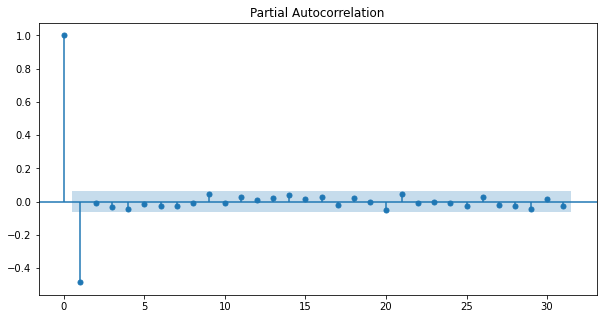

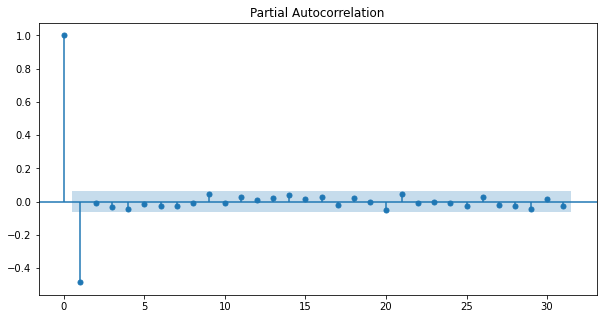

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(x1, ax=ax)

# this time negative

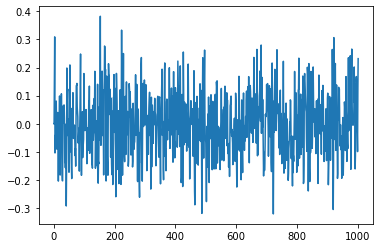

In [10]:
# AR(2) process
# this time ts will depends linearly on 2 past values instead of just 1

x2 = [0, 0] # set 1st 2 values to be 0
for i in range(1000):
    x = 0.5 * x2[-1] - 0.3 * x2[-2] + 0.1 * np.random.randn()
    x2.append(x)
x2 = np.array(x2)

plt.plot(x2)

# cannot distinguish from iid noise but variance in later part seems to be quite high

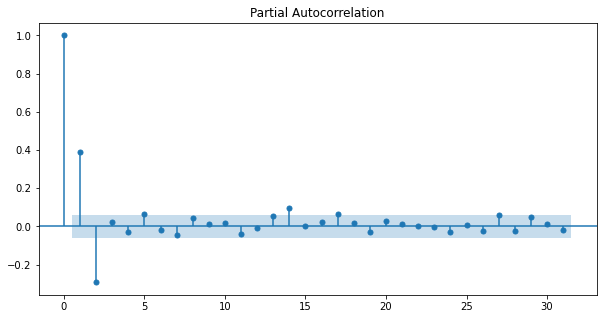

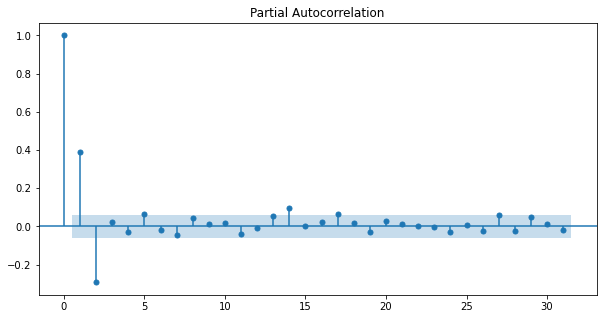

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(x2, ax=ax)

# this time 2 non-zero lags corresponding to the 2 coeff, 1 positive, 1 negative
# --> method works to use this plot to choose p value to fit autoregressive model
# we would definitely choose 2

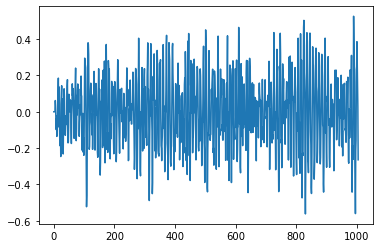

In [12]:
# AR(5) process

x5 = [0, 0, 0, 0, 0] 
for i in range(1000):
    x = 0.5 * x5[-1] - 0.3 * x5[-2] - 0.6 * x5[-5] + 0.1 * np.random.randn() # x depends on 3 different lagged values
    x5.append(x)
x5 = np.array(x5)

plt.plot(x5)

# more of a pattern to the ts

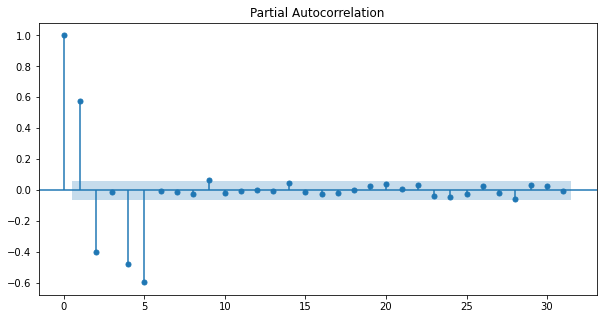

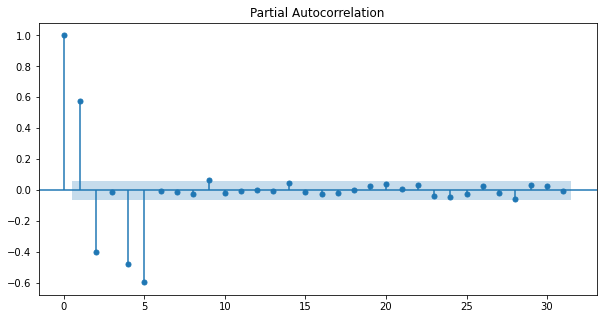

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(x5, ax=ax)

# even though our ts does not depends on lag 3-4 values
# corresponing values in pacf are still non-zero
# when we fit an AR(p) model we will always include these terms
# sign that just because in-between values not affecting next value in ts
# does not mean pacf values will be 0

### ACF

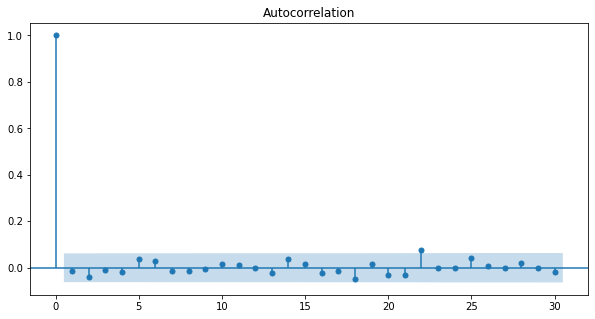

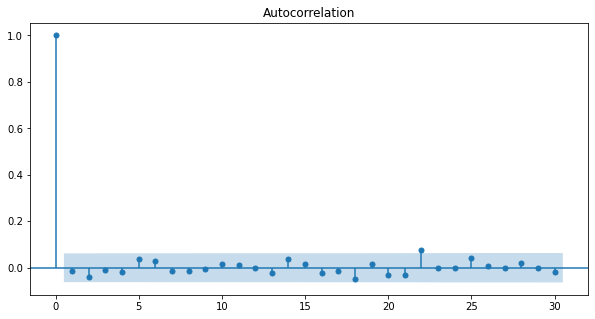

In [14]:
# iid noise

x0 = np.random.randn(1000)

fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(x0, ax=ax)

# no autocorrelation between any point in ts and other

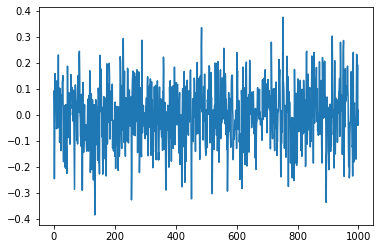

In [15]:
# MA(1) proces (adding current error + coeff * previous )

errors = 0.1 * x0
ma1 = []
for i in range(1000):
    if i >=1:
        x = 0.5 * errors[i-1] + errors[i] # ma equation
    else: # i = 0
        x = errors[i]
    ma1.append(x)
ma1 = np.array(ma1)
    
plt.plot(ma1)

# looks like regular noise

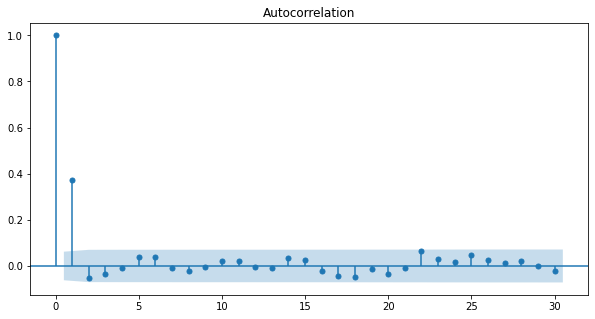

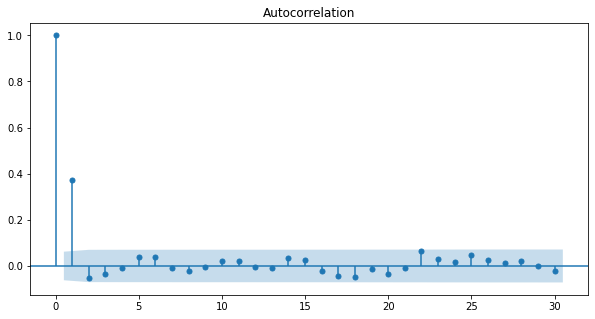

In [16]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(ma1, ax=ax)

# 1 non-zero value...

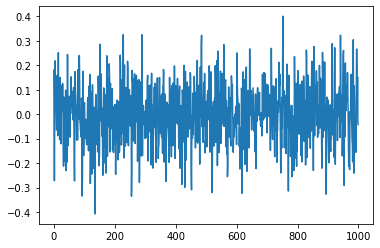

In [18]:
# MA(2)

errors = 0.1 * x0
ma2 = []
for i in range(1000):
    x = 0.5 * errors[i-1] - 0.3 * errors[i-2] + errors[i]
    ma2.append(x)
ma2 = np.array(ma2)

plt.plot(ma2)

# looks like regular noise

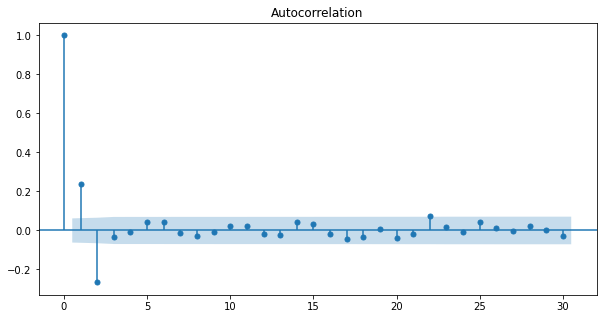

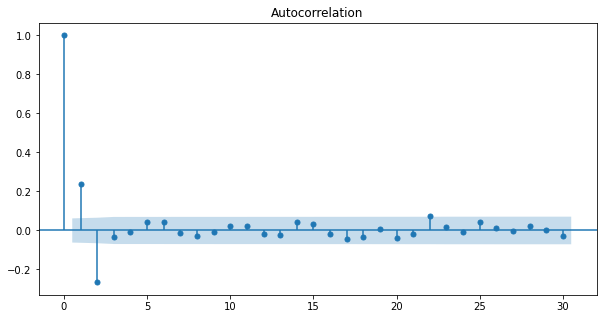

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(ma2, ax=ax)

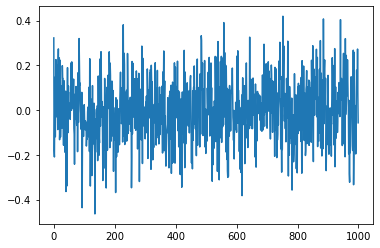

In [21]:
errors = 0.1 * x0
ma3 = []
for i in range(1000):
    x = 0.5 * errors[i-1] - 0.3 * errors[i-2] + 0.7 * errors[i-3] + errors[i]
    ma3.append(x)
ma3 = np.array(ma3)

plt.plot(ma3)

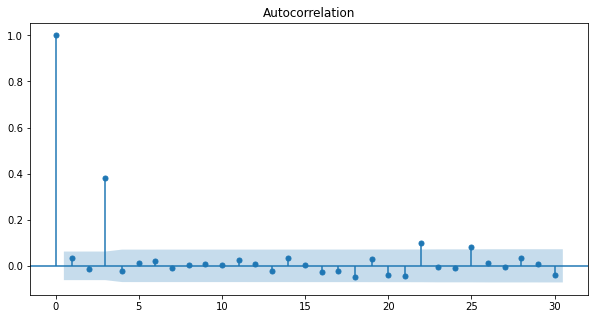

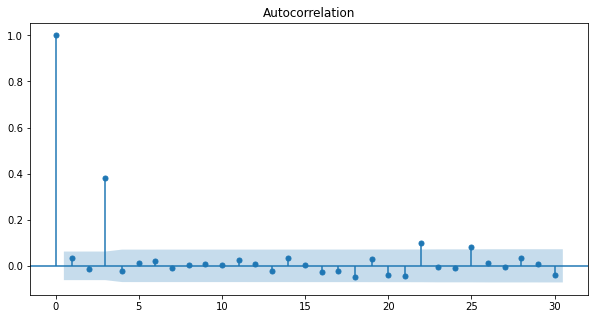

In [22]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(ma3, ax=ax)

# highest value at 3...

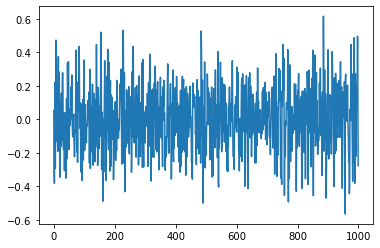

In [23]:
# MA(6) process

errors = 0.1 * x0
ma6 = []
for i in range(1000):
    x = 0.5 * errors[i-1] - 0.3 * errors[i-2] + 0.7 * errors[i-3] + \
    0.2 * errors[i-4] - 0.8 * errors[i-5] - 0.9 * errors[i-6] + errors[i]
    ma6.append(x)
ma6 = np.array(ma6)

plt.plot(ma6)

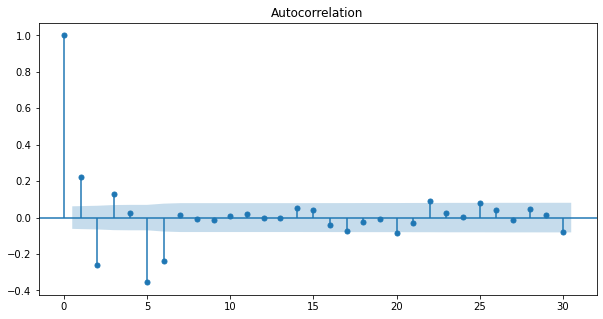

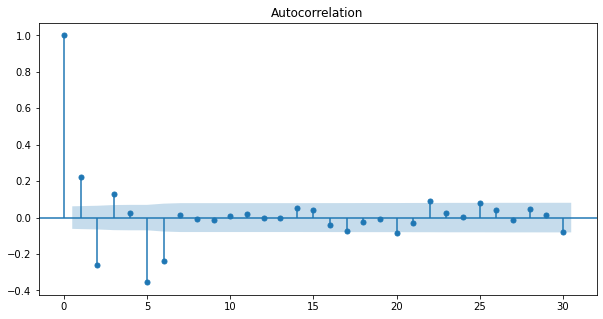

In [24]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(ma6, ax=ax)